# Classify Handwritten-Digits with Keras
[Jian Tao](https://coehpc.engr.tamu.edu/people/jian-tao/), Texas A&M University

June 30, 2023

Modified from the TensorFlow 1.x example.

In [1]:
%load_ext tensorboard
from tensorflow.keras import utils, callbacks, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import numpy as np
import os, datetime

2023-07-03 05:21:18.514318: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

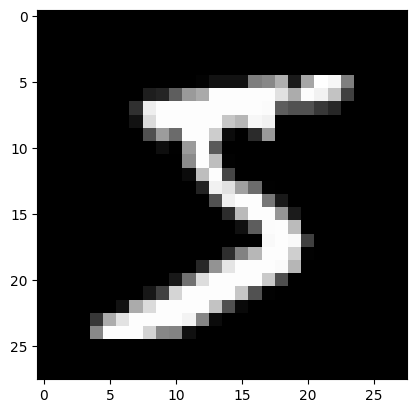

In [3]:
# show the first image in the data set
plt.imshow(X_train[0], cmap="gray") # Import the image
plt.show() # Plot the image

/tmp/ipykernel_56121/3627513717.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


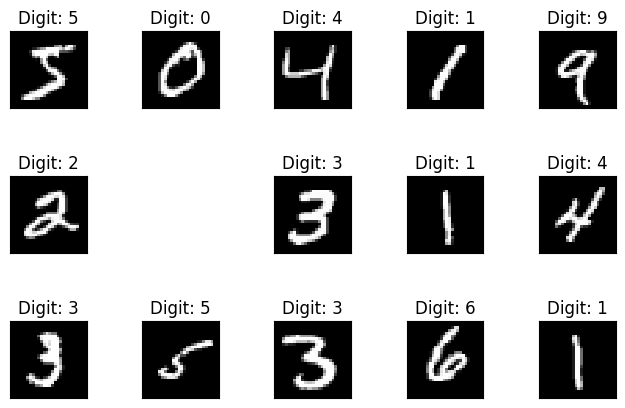

In [4]:
# show the first 15 images in the data set.
fig = plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [5]:
# Normalize the train dataset
X_train = utils.normalize(X_train, axis=1)
# Normalize the test dataset
X_test = utils.normalize(X_test, axis=1)

In [6]:
#Build the model object
model = Sequential()
# Add the Flatten Layer
model.add(Flatten())
# Build the input and the hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
# Build the output layer
model.add(Dense(10, activation='softmax'))

In [7]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
# This is needed for loading Tensorboard.
tensorboard_callback = callbacks.TensorBoard(log_dir="logs", histogram_freq=1)

In [9]:
model.fit(x=X_train, y=y_train, epochs=10, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback]) # Start training process

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2563 - accuracy: 0.9246 - val_loss: 0.1390 - val_accuracy: 0.9580
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1053 - accuracy: 0.9674 - val_loss: 0.1029 - val_accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0722 - accuracy: 0.9773 - val_loss: 0.0936 - val_accuracy: 0.9720
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0518 - accuracy: 0.9833 - val_loss: 0.0886 - val_accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0396 - accuracy: 0.9866 - val_loss: 0.0996 - val_accuracy: 0.9709
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0321 - accuracy: 0.9893 - val_loss: 0.0965 - val_accuracy: 0.9723
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0264 - accuracy: 0.9910 - val_loss: 0.1011 - val_accuracy:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=X_test, y=y_test, verbose=0)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9722999930381775


In [12]:
# Save model into MNIST.h5 and we are all done with the training now.
model.save('MNIST.h5')

In [13]:
model = models.load_model('MNIST.h5')

In [14]:
predictions = model.predict(X_test)

313/313 [==============================] - 0s 717us/step


In [15]:
# function that plots a single image.
def test_digit(i):
    plt.imshow(X_test[i], interpolation='none')
    plt.title("digit:%d   prediction: %d" %(y_test[i], np.argmax(predictions[i])))
    plt.xticks([])
    plt.yticks([])

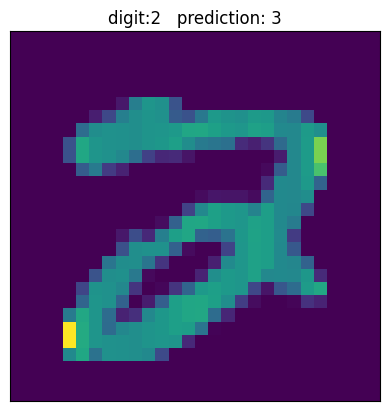

In [16]:
# let's output the images which were not predicted correctly.
for i in range(len(X_test)):
    if np.argmax(predictions[i]) != y_test[i]:
        test_digit(i)

In [17]:
# uncomment the following statement to run tensorboard on Google Colab.
#%tensorboard --logdir  logs

# uncomment the following statement to run on Jupyter
#!tensorboard --logdir="./logs"